In [1]:
!pip install ipython-autotime

%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 4.12 ms (started: 2022-06-26 06:03:17 +00:00)


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
import pandas as pd
import os

time: 1.18 s (started: 2022-06-26 06:03:37 +00:00)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 42.4 s (started: 2022-06-26 06:03:44 +00:00)


In [4]:
cd drive/MyDrive/Project_DIP/DatasetAmericanSignLanguage

/content/drive/MyDrive/Project_DIP/DatasetAmericanSignLanguage
time: 8.6 ms (started: 2022-06-26 06:05:30 +00:00)


In [5]:
directories = os.listdir()
filename = []
label = []

for i in range(0, len(directories)):
  os.chdir(directories[i])
  files = os.listdir()
  for j in range(0, len(files)):
    files[j] = directories[i] + '/' + files[j]
    label.append(directories[i])
  filename = filename + files
  os.chdir("..")
print(filename)
print(label)

['7/hand1_7_top_seg_1_cropped.jpeg', '7/hand1_7_left_seg_1_cropped.jpeg', '7/hand1_7_right_seg_5_cropped.jpeg', '7/hand2_7_bot_seg_4_cropped.jpeg', '7/hand2_7_top_seg_3_cropped.jpeg', '7/hand4_7_bot_seg_1_cropped.jpeg', '7/hand2_7_dif_seg_4_cropped.jpeg', '7/hand2_7_bot_seg_2_cropped.jpeg', '7/hand1_7_left_seg_3_cropped.jpeg', '7/hand1_7_right_seg_3_cropped.jpeg', '7/hand5_7_dif_seg_4_cropped.jpeg', '7/hand2_7_dif_seg_5_cropped.jpeg', '7/hand1_7_top_seg_2_cropped.jpeg', '7/hand1_7_dif_seg_4_cropped.jpeg', '7/hand1_7_dif_seg_5_cropped.jpeg', '7/hand1_7_bot_seg_3_cropped.jpeg', '7/hand1_7_right_seg_1_cropped.jpeg', '7/hand5_7_bot_seg_1_cropped.jpeg', '7/hand1_7_top_seg_5_cropped.jpeg', '7/hand5_7_bot_seg_4_cropped.jpeg', '7/hand1_7_top_seg_4_cropped.jpeg', '7/hand2_7_left_seg_3_cropped.jpeg', '7/hand2_7_bot_seg_1_cropped.jpeg', '7/hand5_7_dif_seg_5_cropped.jpeg', '7/hand1_7_left_seg_5_cropped.jpeg', '7/hand4_7_bot_seg_4_cropped.jpeg', '7/hand2_7_left_seg_4_cropped.jpeg', '7/hand2_7_left_

In [6]:
data = {"filename" : filename, 
        "label": label 
        }
df = pd.DataFrame(data=data)

df_shuffled = df.sample(frac=1)
dataset = df_shuffled
dataset

,filename,label
343,8/hand1_8_left_seg_5_cropped.jpeg,8
728,e/hand2_e_bot_seg_2_cropped.jpeg,e
578,1/hand1_1_top_seg_2_cropped.jpeg,1
320,8/hand2_8_right_seg_5_cropped.jpeg,8
1516,p/hand3_p_dif_seg_4_cropped.jpeg,p
...,...,...
1642,s/hand5_s_dif_seg_4_cropped.jpeg,s
2453,x/hand3_x_dif_seg_3_cropped.jpeg,x
1432,r/hand5_r_dif_seg_4_cropped.jpeg,r
1126,g/hand1_g_left_seg_4_cropped.jpeg,g


time: 32.4 ms (started: 2022-06-26 06:06:31 +00:00)


#Image Preprocessing

In [7]:
# baca data dengan opencv (ditampilkan gambar)

def load_images_files(train_data):
  # definisikan 2 list kosong
  images = []
  Y = []

  for obj in train_data.values:
    # index 0 ([0]) adalah kolom filename, (tidak menggunakan label karena untuk cv2 baca lewat lokasi nya)
    img = cv2.imread(obj[0])
    # smoothing
    img_pred = cv2.GaussianBlur(img, (5, 5), 0)
    # sharpening
    kernel = np.array([[-1,-1,-1], 
                       [-1,9,-1], 
                       [-1,-1,-1]])
    img_pred = cv2.filter2D(img_pred, -1, kernel)
    # resize
    img_pred = cv2.resize(img, (128, 128), interpolation = cv2.INTER_AREA)
    # ubah rentang pixel yang awalnya 0 - 255 menjadi 0 - 1
    img_pred = img_pred / 255
    # algoritma nearest neighbour bekerja pada 1 dimensi
    # ada 3 perkalian karena gambar berwarna, punya 3 channel rgb
    img_pred = img_pred.reshape(img_pred.shape[0] * img_pred.shape[1] * img_pred.shape[2])
    
    # masukkan ke list images
    images.append(img_pred)
    # tiap row yang ada di Y merepresentasikan label yang ada di images
    Y.append(obj[1])
    
  X = np.array(images)
  Y = np.array(Y)
  
  return X, Y

time: 24.2 ms (started: 2022-06-26 06:06:51 +00:00)


In [8]:
# Split into training and testing data
X, y = load_images_files(dataset)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 21, test_size = 0.3) #test size = 30% untuk testing, 70% untuk training

print("Data shape: ", X.shape)
print(y.shape)
print("X_train: ", X_train.shape) #70% dari data shape
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape) #30% dari data shape
print("y_test: ", y_test.shape)

Data shape:  (2515, 49152)
(2515,)
X_train:  (1760, 49152)
y_train:  (1760,)
X_test:  (755, 49152)
y_test:  (755,)
time: 11min 29s (started: 2022-06-26 06:07:30 +00:00)


# Method

## Gaussian Naive Bayes

In [9]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
GNBVal = metrics.accuracy_score(y_test, y_pred)*100
print("Gaussian Naive Bayes model accuracy(in %):", GNBVal)

Gaussian Naive Bayes model accuracy(in %): 62.78145695364239
time: 7.68 s (started: 2022-06-26 06:23:14 +00:00)


##Random Forest

In [10]:
from sklearn import ensemble
from sklearn.metrics import accuracy_score

rf = ensemble.RandomForestClassifier(n_estimators=500)

# Train the model on training data
rf.fit(X_train, y_train)
# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
RFVal = accuracy_score(y_test, y_pred)*100
print("Random Forest model accuracy(in %):", RFVal)

Random Forest model accuracy(in %): 95.89403973509934
time: 1min 15s (started: 2022-06-26 06:37:39 +00:00)


##Decision Tree

In [11]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(
        criterion = "gini", random_state = 100, 
        max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
      
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
        criterion = "entropy", random_state = 100,
        max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
  
# Function to make predictions
def DTprediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    #print("Predicted values:")
    #print(y_pred)
    return y_pred
      
# Building Phase
clf_gini = train_using_gini(X_train, X_test, y_train)
clf_entropy = tarin_using_entropy(X_train, X_test, y_train)
  
# Prediction using gini
y_pred_gini = DTprediction(X_test, clf_gini)
DTVal =accuracy_score(y_test,y_pred)*100
print("Decision Tree model accuracy(in %):",DTVal)

Decision Tree model accuracy(in %): 95.89403973509934
time: 1min (started: 2022-06-26 06:54:21 +00:00)


##K-Nearest Neighbors

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

KNNVal = 0

for i in range(1, 16):
  knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  KNNVal = accuracy_score(y_test, y_pred)*100
  print('K=', i, 'Accuracy Score(in %):', KNNVal)

K= 1 Accuracy Score(in %): 97.6158940397351
K= 2 Accuracy Score(in %): 94.83443708609272
K= 3 Accuracy Score(in %): 93.50993377483444
K= 4 Accuracy Score(in %): 91.52317880794702
K= 5 Accuracy Score(in %): 90.99337748344371
K= 6 Accuracy Score(in %): 87.68211920529801
K= 7 Accuracy Score(in %): 86.6225165562914
K= 8 Accuracy Score(in %): 86.2251655629139
K= 9 Accuracy Score(in %): 84.63576158940397
K= 10 Accuracy Score(in %): 82.9139072847682
K= 11 Accuracy Score(in %): 82.9139072847682
K= 12 Accuracy Score(in %): 82.9139072847682
K= 13 Accuracy Score(in %): 82.9139072847682
K= 14 Accuracy Score(in %): 82.11920529801324
K= 15 Accuracy Score(in %): 82.11920529801324
time: 1min 11s (started: 2022-06-26 07:10:32 +00:00)


##SVM

In [13]:
#Classify the image using SVM Classifier
from sklearn import svm
#Createasvm Classifier
clf=svm.SVC(kernel='poly')#Linear Kernel
#Train the model using the training sets
clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred=clf.predict(X_test)

SVMVal = accuracy_score(y_test,y_pred)*100
print("Accuracy Score (in %):", SVMVal)

Accuracy Score (in %): 95.2317880794702
time: 1min 31s (started: 2022-06-26 07:13:02 +00:00)


##K-Fold Cross Validation


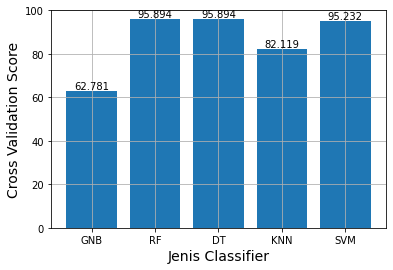

time: 172 ms (started: 2022-06-26 07:18:03 +00:00)


In [14]:
import matplotlib.pyplot as plt

# labels for bars
x = ['GNB', 'RF', 'DT', 'KNN', 'SVM']

# heights of bars
y = [round(GNBVal,3), round(RFVal,3), round(DTVal,3), round(KNNVal,3), round(SVMVal,3)]
 
# plotting a bar chart
plt.bar(x, y)

# add value labels
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha="center", va="bottom")

# plot title
# plt.title('Perbandingan Cross Validation Score untuk tiap jenis Classifier', fontsize=14)
# naming the x-axis
plt.xlabel('Jenis Classifier', fontsize=14)
# naming the y-axis
plt.ylabel('Cross Validation Score', fontsize=14)

plt.ylim(0,100)

plt.grid(True)
# function to show the plot
plt.show()

#Testing

In [15]:
def load_single_image_files(path):
    images = []
    img = cv2.imread(path)
    # smoothing
    img_pred = cv2.GaussianBlur(img, (5, 5), 0)
    # sharpening
    kernel = np.array([[-1,-1,-1], 
                       [-1,9,-1], 
                       [-1,-1,-1]])
    img_pred = cv2.filter2D(img_pred, -1, kernel)
    # resize
    img_pred = cv2.resize(img, (128, 128), interpolation = cv2.INTER_AREA)
    # ubah rentang pixel yang awalnya 0 - 255 menjadi 0 - 1
    img_pred = img_pred / 255
    # algoritma nearest neighbour bekerja pada 1 dimensi
    # ada 3 perkalian karena gambar berwarna, punya 3 channel rgb
    img_pred = img_pred.reshape(img_pred.shape[0] * img_pred.shape[1] * img_pred.shape[2])
    
    # masukkan ke list images
    images.append(img_pred)
    
    X = np.array(images)
    return X

time: 17.7 ms (started: 2022-06-26 07:18:51 +00:00)


Saving hand1_n_left_seg_3_cropped.jpeg to hand1_n_left_seg_3_cropped.jpeg

Prediksi menggunakan Gaussian Naive Bayes
['t']

Prediksi menggunakan Random Forest
['n']

Prediksi menggunakan DT (Decission Tree) Classifier
['5']

Prediksi menggunakan K-Nearest Neighbor
['n']

Prediksi menggunakan SVM (Support Vector Machine) Classifier
['n']



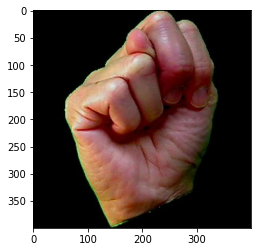

time: 1min 2s (started: 2022-06-26 07:19:03 +00:00)


In [16]:
from matplotlib import image
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  #Predicting images
  path = fn

  X_single = load_single_image_files(path)

  img =  cv2.imread(path)
  imgshow = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  imgplot = plt.imshow(imgshow)

  print("")

  nb_pred_single = gnb.predict(X_single)
  print("Prediksi menggunakan Gaussian Naive Bayes")
  print(nb_pred_single)

  print("")

  rf_pred_single = rf.predict(X_single)
  print("Prediksi menggunakan Random Forest")
  print(rf_pred_single)

  print("")
  
  dt_pred_single = DTprediction(X_single, clf_gini)
  print("Prediksi menggunakan DT (Decission Tree) Classifier")
  print(dt_pred_single)

  print("")

  knn_pred_single = knn.predict(X_single)
  print("Prediksi menggunakan K-Nearest Neighbor")
  print(knn_pred_single)

  print("")

  svm_pred_single = clf.predict(X_single)
  print("Prediksi menggunakan SVM (Support Vector Machine) Classifier")
  print(svm_pred_single)

  print("")